In [121]:
#Libraries
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [122]:
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs')
DATA=pd.read_excel(r'Sheets_of_STAT/STAT1-PreMon.xlsx',sheet_name='Sheet1')
DATA.head()

,AnthroPogenic-AOD,DUST-AOD,AI,Nd,CloudRadius,LWP,AOD
0,0.346227,0.105905,0.541496,36.631366,14.03,47,0.418640
1,0.353710,0.111187,0.553165,49.941596,13.32,11,0.433388
2,0.625789,0.108512,0.953549,41.861894,14.46,40,0.693815
3,0.807299,0.090955,1.308411,31.150571,15.04,44,0.829648
4,0.509958,0.072707,0.827088,12.490219,20.69,91,0.538220


# OneWay of binning

In [123]:
%%script echo skipping
bins = [0, 0.05, 0.35, 0.5, 1.5]
labels = ['VeryLow', 'Medium', 'High' ,'VeryHigh']
DATA['AI-Cateogory'] = pd.cut(x = DATA['AI'], bins = bins, labels = labels, include_lowest = True)
DATA.head()
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_Stat')
DATA.to_excel('STAT2-PreMon.xlsx')

skipping


# Second Way of binning

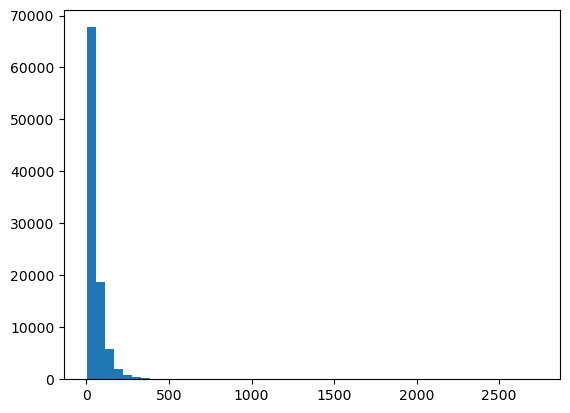

In [124]:
#Normal Binning
data=DATA['LWP']

n, bins, patches =plt.hist(data,bins=50)
plt.show()

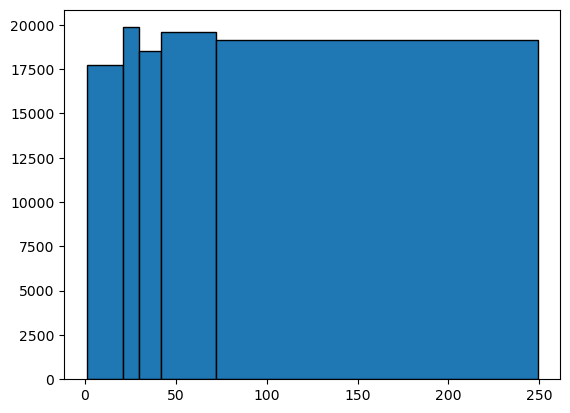

In [125]:

bins=5
data=data[data<250]
def equalObs(x,nBin):
    nlen=len(x)
    return np.interp(np.linspace(0,nlen,nBin+1),
                     np.arange(nlen),
                     np.sort(x))
    
n, bins, patches = plt.hist(data,equalObs(data,bins), edgecolor='black')
plt.show()

In [126]:
%%script echo skipping
for i in range(0,len(bins)):
    print(float(bins[i]))

skipping


# Visualizing the Data

In [127]:
%%script echo skipping
import seaborn as sns
plt.figure(figsize=(16,5))
sns.distplot(DATA['LWP'])

skipping


In [128]:
print("Highest allowed",DATA['LWP'].mean() + 3*DATA['LWP'].std())


Highest allowed 225.28722742823706


# Dividing the dataset Based on LWP

In [129]:
bin=[1.0, 20.0, 30.0, 45.0, 75.0, 250.0]
ds=DATA
ds.rename(columns = {'AnthroPogenic-AOD':'anAOD'}, inplace = True)
ds.head()
DATA=ds

# Cateogorising as per Percentile groups

In [130]:
path = '/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_Stat/STAT4-ReAIp'
isExist = os.path.exists(path)
if not isExist:
   os.makedirs(path)

os.chdir(path)
for i in range(0,len(bin)-1):
    binn=ds[(ds['LWP']>bin[i]) & (ds['LWP']<bin[i+1])]

    percentiles=[DATA.AI.quantile(.05), DATA.AI.quantile(.35), DATA.AI.quantile(.65), DATA.AI.quantile(.95)]
   #  percentiles=[DATA.anAOD.quantile(.05), DATA.anAOD.quantile(.35), DATA.anAOD.quantile(.65), DATA.anAOD.quantile(.95)]
   #  percentiles=[DATA.AOD.quantile(.05), DATA.AOD.quantile(.35), DATA.AOD.quantile(.65), DATA.AOD.quantile(.95)]
    
    labels = ['5-35', '35-65', '65-95']
    binn['AI-Cateogory'] = pd.cut(x = binn['AI'], bins = percentiles, labels = labels, include_lowest = True)
    binn=binn[binn['AI-Cateogory'].notna()]
    name='STAT3-Bin'+str(i)+'.xlsx'
    binn.to_excel(name)


# Writing for the easiness of boxPlot

In [131]:
os.chdir(path)

dict={}
for i in range(0,5):
    name='STAT3-Bin'+str(i)+'.xlsx'
    DATA=pd.read_excel(name,sheet_name='Sheet1')
    x=DATA.CloudRadius[DATA['AI-Cateogory']=='5-35']
    x=x.dropna().values
    y=DATA.CloudRadius[DATA['AI-Cateogory']=='35-65']
    y=y.dropna().values
    z=DATA.CloudRadius[DATA['AI-Cateogory']=='65-95']
    z=z.dropna().values
    dict['LWP-'+str(i)+'5-35']=pd.Series(x)
    dict['LWP-'+str(i)+'35-65']=pd.Series(y)
    dict['LWP-'+str(i)+'65-95']=pd.Series(z)
    
df=pd.DataFrame(dict)


In [132]:
df.to_excel('../STAT5-PreMonReAI.xlsx')